In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import xarray_extras.csv as csv
import cmcrameri 
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from matplotlib.colors import Normalize, CenteredNorm
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [2]:
idx = {"u10":0, "v10":1, "t2m":2, "t850":3, "z500":4}
results_path = "../results/pangu/"
plot_path = "../plots/pangu/"

In [3]:
# Open Pangu
pangu_rfp = xr.open_dataset(results_path + "pangu_rfp_crps.h5").rename({"phony_dim_0" : "ics", "phony_dim_1" : "lead_time",
                                                                       "phony_dim_2": "var", "phony_dim_3": "lat", "phony_dim_4": "lon"}).crps

pangu_rnp = xr.open_dataset(results_path + "pangu_rnp_crps.h5").rename({"phony_dim_0" : "ics", "phony_dim_1" : "lead_time",
                                                                       "phony_dim_2": "var", "phony_dim_3": "lat", "phony_dim_4": "lon"}).crps

pangu_ifsp = xr.open_dataset(results_path + "pangu_ifsp_crps.h5").rename({"phony_dim_0" : "ics", "phony_dim_1" : "lead_time",
                                                                       "phony_dim_2": "var", "phony_dim_3": "lat", "phony_dim_4": "lon"}).crps

pangu_eq = xr.open_dataset(results_path + "pangu_eq_old.h5").rename({"phony_dim_0" : "ics", "phony_dim_1" : "lead_time",
                                                                       "phony_dim_2": "var", "phony_dim_3": "lat", "phony_dim_4": "lon"}).eq

pangu_drn = xr.open_dataset(results_path + "pangu_drn.h5").isel(phony_dim_0 = 2).rename({"phony_dim_1" : "ics", "phony_dim_2" : "lead_time",
                                                                       "phony_dim_3": "var", "phony_dim_4": "lat", "phony_dim_5": "lon"}).drn

ecmwf_ics = xr.open_dataset("../results/fcn/ecmwf_crps.h5").rename({"phony_dim_0" : "ics", "phony_dim_1" : "lead_time",
                                                                                                    "phony_dim_2": "var", "phony_dim_3": "lat", "phony_dim_4": "lon"}).ics

In [4]:
# Plot parameters
plt.style.use('seaborn-v0_8-whitegrid')
cmap_name = "cmc.roma_r"
cmap = plt.get_cmap(cmap_name)
plt.rcParams['image.cmap'] = cmap_name

cmap_error = "cmc.vik"

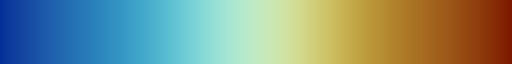

In [5]:
cmap

In [6]:
# Sizes
lw = 4.2
titlesize = 35
ticksize = 25
axissize = 30

In [7]:
# ECMWF Europe grid 
# 35-75°N und von 12.5°W bis 42.5°E
lon = [-12.5, 42.5]
lat = [35,75]
lons = np.arange(lon[0], lon[1], 0.25)
lats = np.flip(np.arange(lat[0], lat[1], 0.25))

In [8]:
lead_times = [4,12,28]

In [9]:
methods = ["ECMWF IFS", "GNP", "IFSP", "RFP", "EasyUQ", "DRN"]

In [10]:
colors = {"ECMWF IFS": "black", "GNP": cmap(0.01), "IFSP": cmap(0.25), "RFP": cmap(0.38), "EasyUQ": cmap(0.65), "DRN": cmap(0.8)}

# Aggregated results table

In [ ]:
iterables = [["Short","Mid", "Long"],["u10", "v10", "t2m", "t850", "z500"]]
col_names = ["ECMWF IFS", "GNP", "IFSP", "RFP", "EasyUQ", "DRN"]
methods = [ecmwf_ics, pangu_rnp, pangu_ifsp, pangu_rfp, pangu_eq, pangu_drn]

index = pd.MultiIndex.from_product(iterables, names=["Lead time", "variables"])

data = pd.DataFrame(np.zeros((15,6)), index=index, columns = col_names)

for var in list(idx.keys()):
    #Other methods
    for x, method in enumerate(methods):
        data.loc[("Short", var), col_names[x]] = method.isel(var = idx[var], lead_time = slice(1,9)).mean()
        data.loc[("Mid", var), col_names[x]] = method.isel(var = idx[var], lead_time = slice(9,21)).mean()
        data.loc[("Long", var), col_names[x]] = method.isel(var = idx[var], lead_time = slice(21,32)).mean()     

In [ ]:
print(data.to_latex(index=True, float_format="{:.3f}".format))

# Comparison

In [67]:
methods = ["ECMWF IFS", "GNP", "IFSP", "RFP", "EasyUQ", "DRN"]

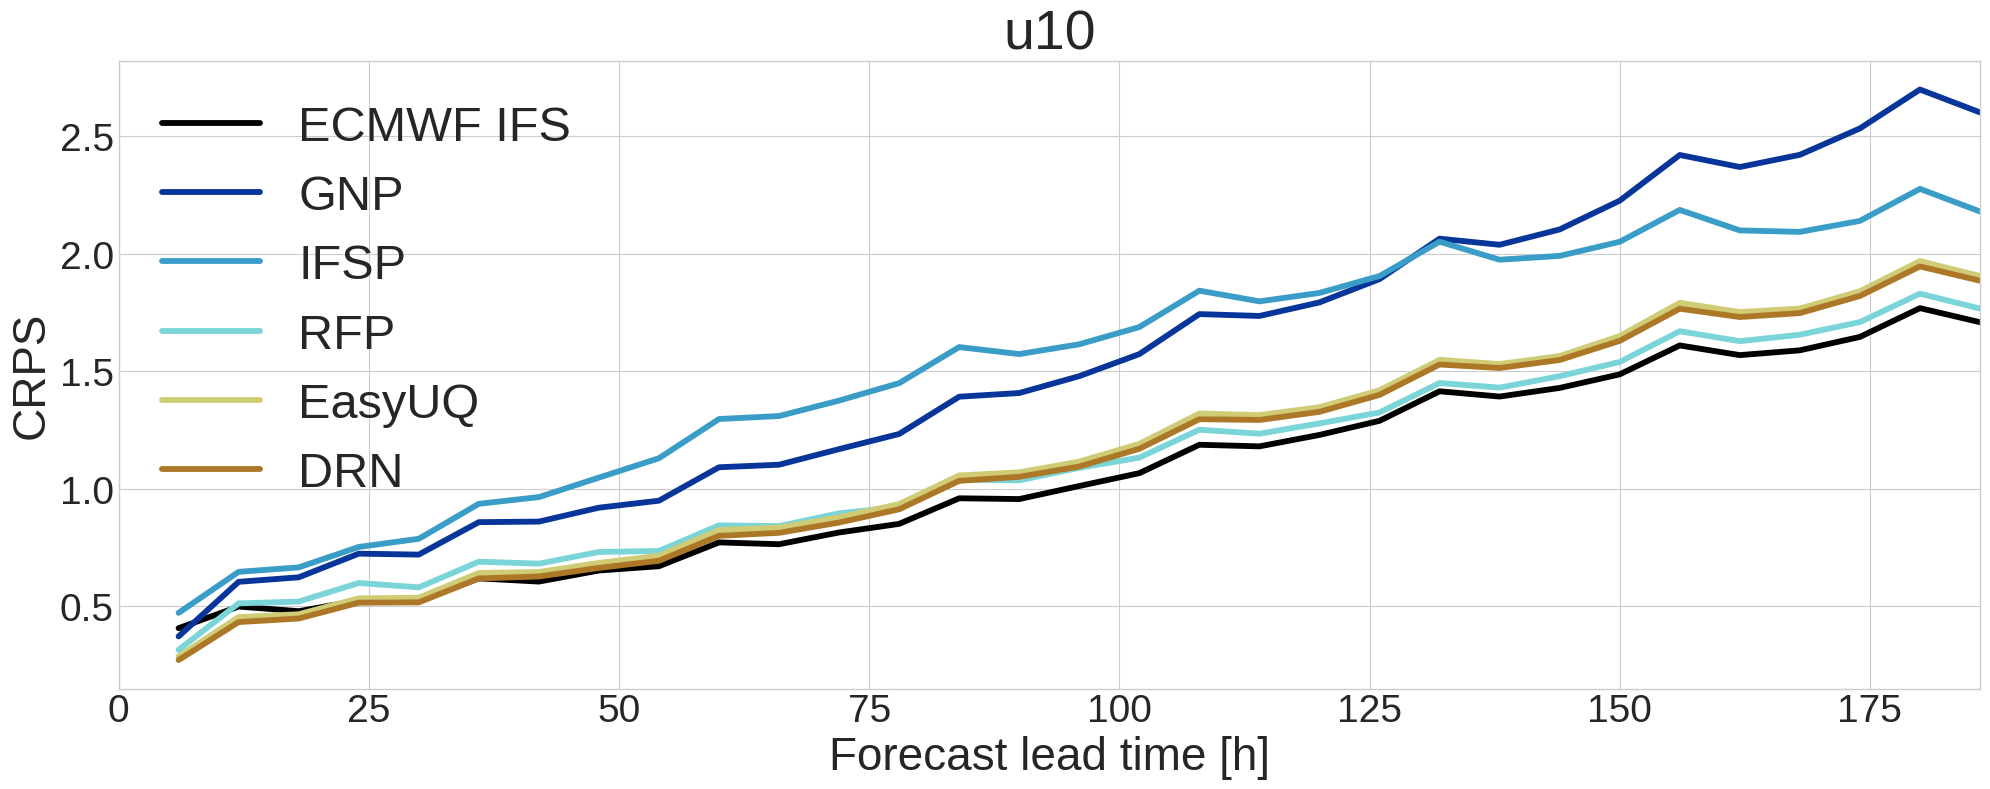

In [79]:
fig, axs = plt.subplots(figsize = (20,8))
hour_range = np.arange(1, ecmwf_ics.shape[1])*6
marker = " "
var = "u10"

axs.plot(hour_range, ecmwf_ics.isel(var = idx[var], lead_time = slice(1,32)).mean(dim = ["ics", "lat", "lon"]), marker = marker, color = colors["ECMWF IFS"], lw = lw)    
axs.plot(hour_range, pangu_rnp.isel(var = idx[var], lead_time = slice(1,32)).mean(dim = ["ics", "lat", "lon"]), marker = marker, color = colors["GNP"], lw = lw)    
axs.plot(hour_range, pangu_ifsp.isel(var = idx[var], lead_time = slice(1,32)).mean(dim = ["ics", "lat", "lon"]), marker = marker, color = colors["IFSP"], lw = lw)    
axs.plot(hour_range, pangu_rfp.isel(var = idx[var], lead_time = slice(1,32)).mean(dim = ["ics", "lat", "lon"]), marker = marker, color = colors["RFP"], lw = lw)    
axs.plot(hour_range, pangu_eq.isel(var = idx[var], lead_time = slice(1,32)).mean(dim = ["ics", "lat", "lon"]), marker = marker, color = colors["EasyUQ"], lw = lw)      
axs.plot(hour_range, pangu_drn.isel(var = idx[var], lead_time = slice(1,32)).mean(dim = ["ics", "lat", "lon"]), marker = marker, color = colors["DRN"], lw = lw)  


axs.set_title(f"{var}", fontsize = titlesize+5)
axs.set_xlim([0, 186])
axs.tick_params(axis='both', labelsize = ticksize+3)
    
axs.set_xlabel("Forecast lead time [h]", fontsize = axissize+3)
axs.set_ylabel("CRPS", fontsize = axissize+3)
   
axs.legend(labels = methods, fontsize = titlesize)
    
fig.tight_layout()

# Per time

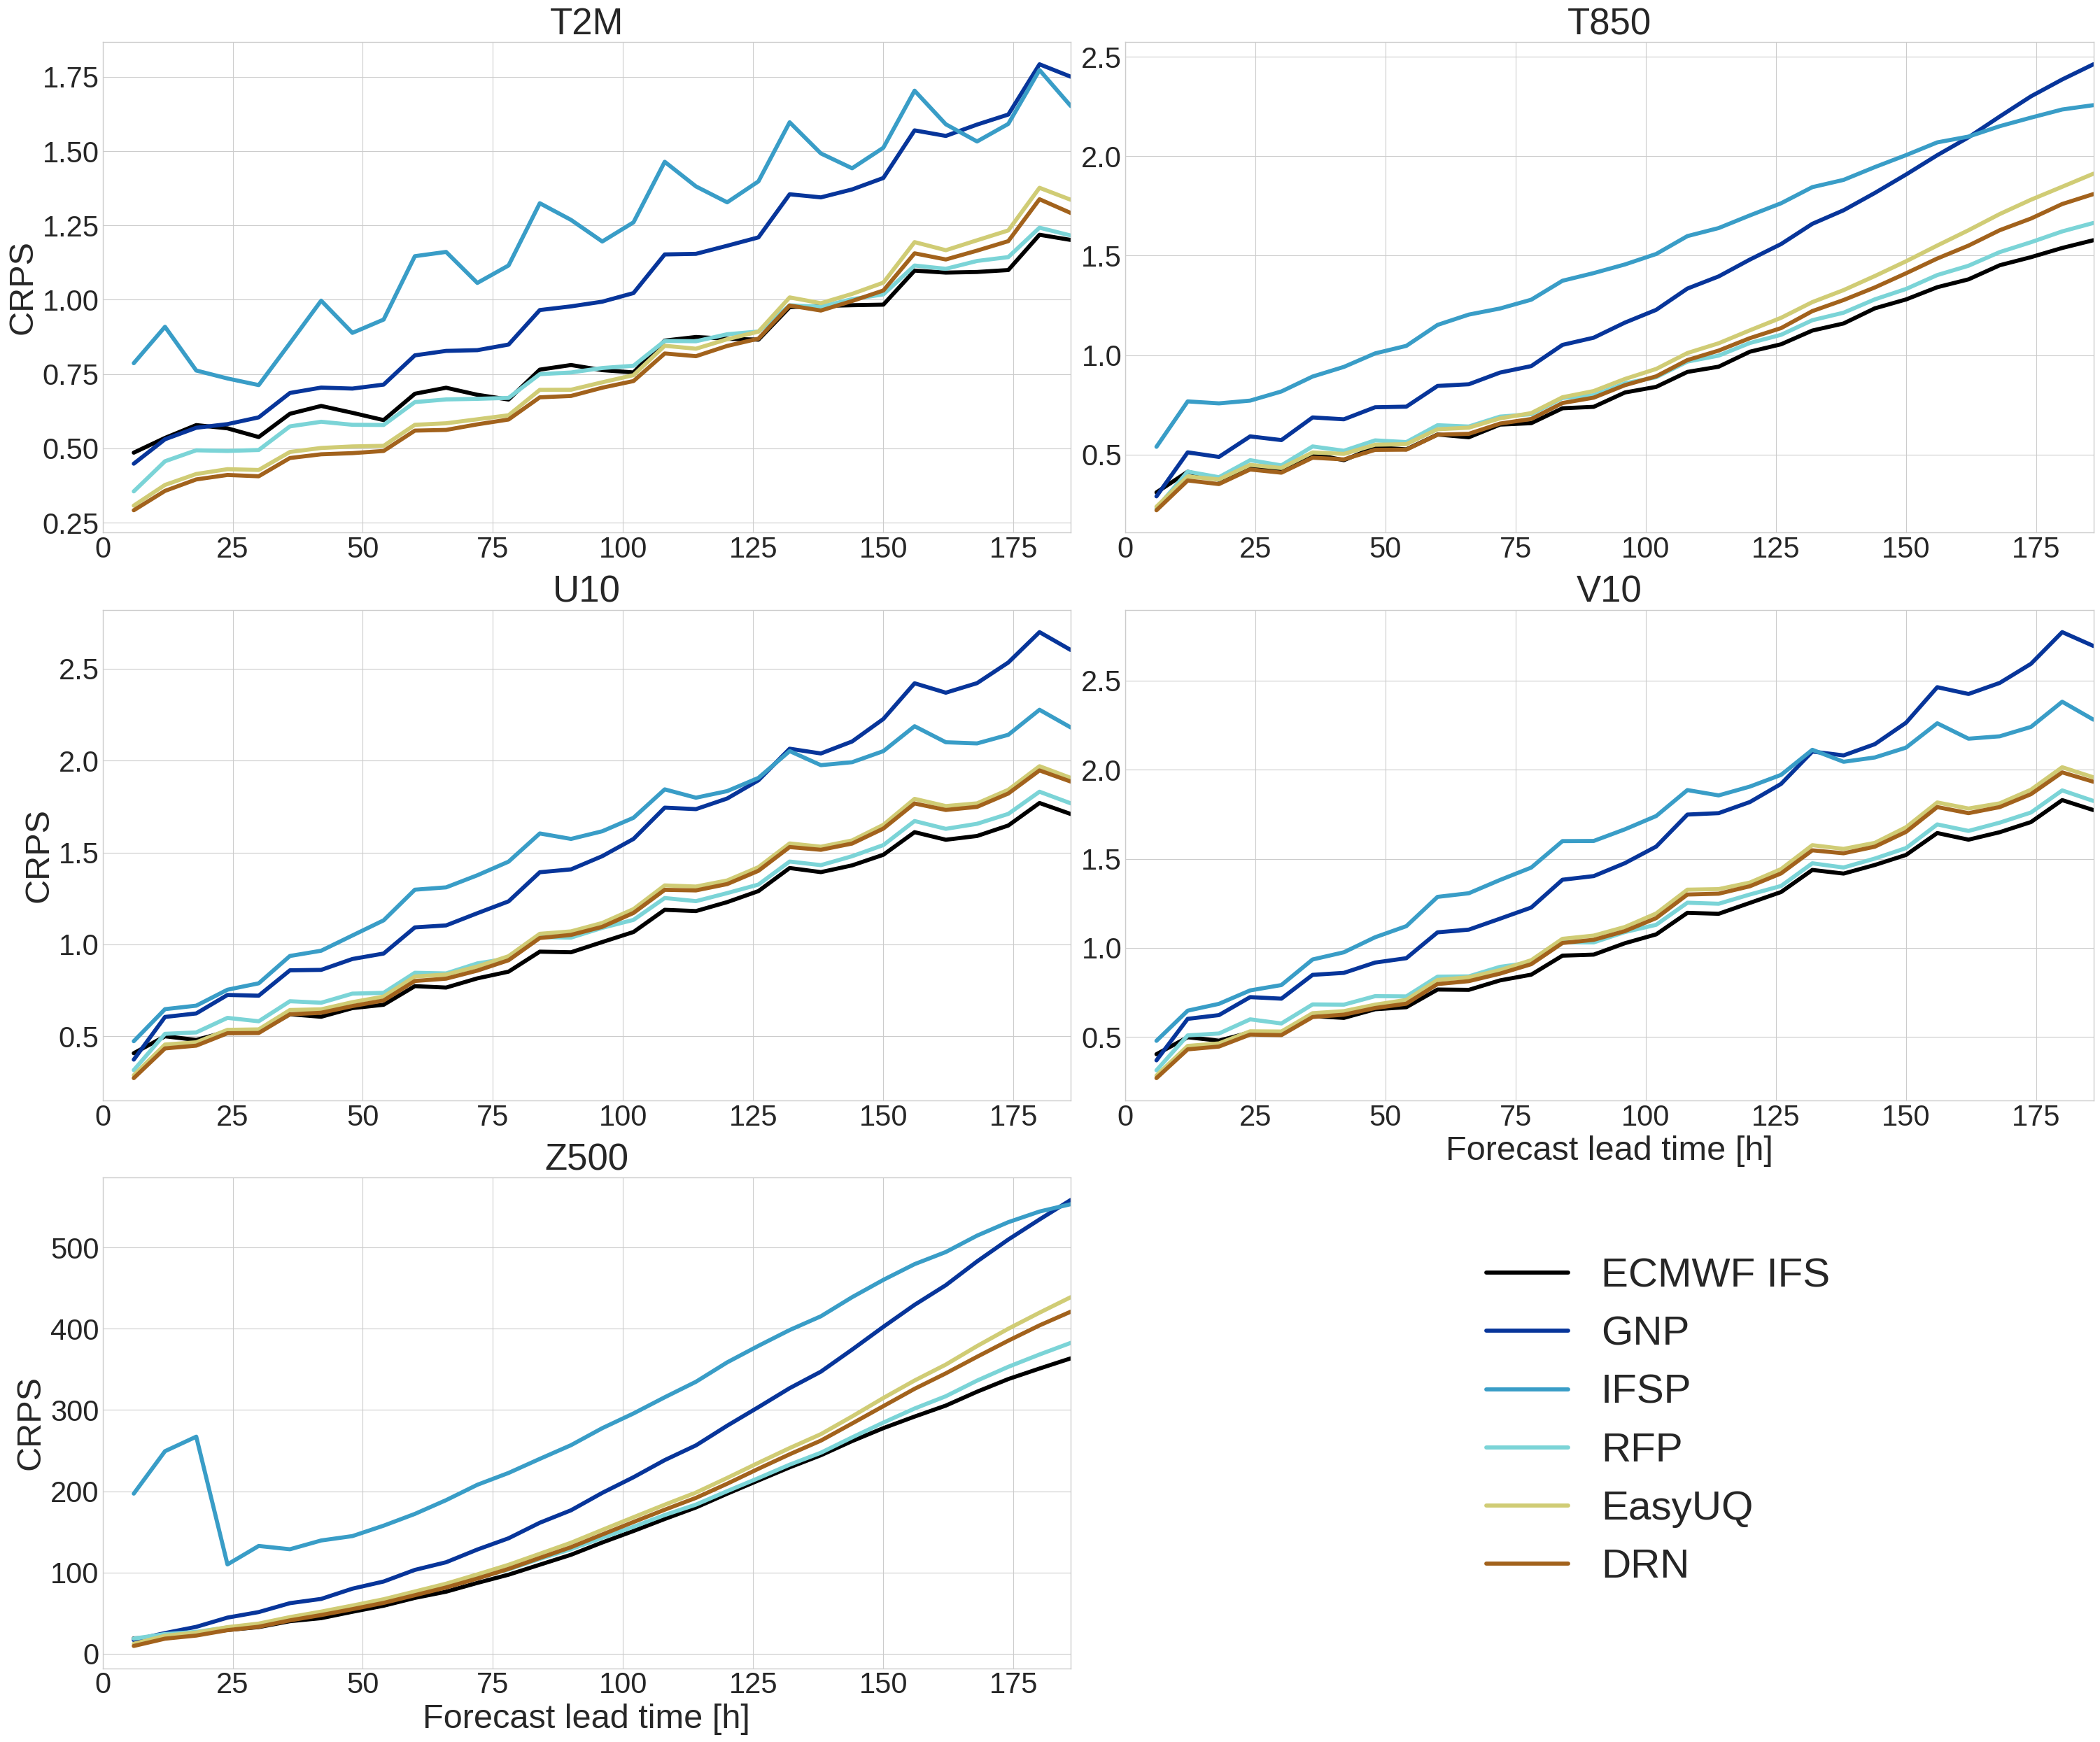

In [76]:
fig, axs = plt.subplots(3, 2, figsize = (30,25))
axs = axs.ravel()
hour_range = np.arange(1, ecmwf_ics.shape[1])*6
marker = " "

for i, var in enumerate([2,3,0,1,4]):
    axs[i].plot(hour_range, ecmwf_ics.isel(var = var, lead_time = slice(1,32)).mean(dim = ["ics", "lat", "lon"]), marker = marker, color = colors["ECMWF IFS"], lw = lw)    
    axs[i].plot(hour_range, pangu_rnp.isel(var = var, lead_time = slice(1,32)).mean(dim = ["ics", "lat", "lon"]), marker = marker, color = colors["GNP"], lw = lw)    
    axs[i].plot(hour_range, pangu_ifsp.isel(var = var, lead_time = slice(1,32)).mean(dim = ["ics", "lat", "lon"]), marker = marker, color = colors["IFSP"], lw = lw)   
    axs[i].plot(hour_range, pangu_rfp.isel(var = var, lead_time = slice(1,32)).mean(dim = ["ics", "lat", "lon"]), marker = marker, color = colors["RFP"], lw = lw)    
    axs[i].plot(hour_range, pangu_eq.isel(var = var, lead_time = slice(1,32)).mean(dim = ["ics", "lat", "lon"]), marker = marker, color = colors["EasyUQ"], lw = lw)      
    axs[i].plot(hour_range, pangu_drn.isel(var = var, lead_time = slice(1,32)).mean(dim = ["ics", "lat", "lon"]), marker = marker, color = colors["DRN"], lw = lw)  

    axs[i].set_title(f"{list(idx.keys())[var]}".upper(), fontsize = titlesize+3)
    axs[i].set_xlim([0, 186])
    axs[i].tick_params(axis='both', labelsize = ticksize+5)
    
axs[3].set_xlabel("Forecast lead time [h]", fontsize = axissize+5)
axs[4].set_xlabel("Forecast lead time [h]", fontsize = axissize+5)
axs[0].set_ylabel("CRPS", fontsize = axissize+5)
axs[2].set_ylabel("CRPS", fontsize = axissize+5)
axs[4].set_ylabel("CRPS", fontsize = axissize+5)

#Remove unused axis
axs[5].remove()
    
fig.legend(loc=(0.7,0.08), labels = methods, fontsize = titlesize+7)
    
fig.tight_layout()
plt.savefig(plot_path + f"cprs_per_time.pdf", bbox_inches = "tight", dpi = 300)

# Per gridpoint (CRPSS)

In [ ]:
fig, axs = plt.subplots(3,5, figsize = (28,10),subplot_kw={'projection': ccrs.PlateCarree()})
var = 4

for ax in axs.ravel():
    ax.set_extent([lon[0], lon[1]-0.25, lat[0], lat[1]], crs=ccrs.PlateCarree())
    ax.add_feature(cfeature.COASTLINE)

normalizer=CenteredNorm(halfrange = 1)
im=cm.ScalarMappable(norm=normalizer, cmap = cmap_error)

for t, lead_time in enumerate(lead_times):    
    ref = ecmwf_ics.isel(var = var, lead_time = lead_time).mean(dim = ["ics"])    
    axs[t,0].contourf(lons, lats, (ref.data-pangu_rnp.isel(var = var, lead_time = lead_time).mean(dim = ["ics"]))/ref.data, 60, transform=ccrs.PlateCarree(), norm = normalizer, cmap = cmap_error)
    axs[t,1].contourf(lons, lats, (ref.data-pangu_ifsp.isel(var = var, lead_time = lead_time).mean(dim = ["ics"]))/ref.data, 60, transform=ccrs.PlateCarree(), norm = normalizer, cmap = cmap_error)
    axs[t,2].contourf(lons, lats, (ref.data-pangu_rfp.isel(var = var, lead_time = lead_time).mean(dim = ["ics"]))/ref.data, 60, transform=ccrs.PlateCarree(), norm = normalizer, cmap = cmap_error)
    axs[t,3].contourf(lons, lats, (ref.data-pangu_eq.isel(var = var, lead_time = lead_time).mean(dim = ["ics"]))/ref.data, 60, transform=ccrs.PlateCarree(), norm = normalizer, cmap = cmap_error)
    axs[t,4].contourf(lons, lats, (ref.data-pangu_drn.isel(var = var, lead_time = lead_time).mean(dim = ["ics"]))/ref.data, 60, transform=ccrs.PlateCarree(), norm = normalizer, cmap = cmap_error)
    
    # Lead time
    axs[t,0].set_xticks([])
    axs[t,0].set_yticks([])
    axs[t,0].set_ylabel(f"Lead time: {lead_time *6}h", fontsize = axissize)

# Set title
axs[0,0].set_title("GNP", fontsize = axissize)
axs[0,1].set_title("IFSP", fontsize = axissize)
axs[0,2].set_title("RFP", fontsize = axissize)
axs[0,3].set_title("EasyUQ", fontsize = axissize)
axs[0,4].set_title("DRN", fontsize = axissize)

# Remove all axis label
axs = axs.ravel()
for i in range(len(axs)):
    if i%5!=0:
        axs[i].set_ylabel(None)
    axs[i].set_xlabel(None)

plt.tight_layout()
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.805, 0.05, 0.05, 0.86])
cb = fig.colorbar(im, cax=cbar_ax)
cb.ax.tick_params(labelsize=ticksize)

#plt.suptitle(f"CRPSS against Gaussian model for variable {list(idx.keys())[var]}", fontsize = titlesize)

#plt.savefig(plot_path + f"crpss_per_grid_{list(idx.keys())[var]}.png", bbox_inches = "tight")

In [ ]:
%%capture

for var in range(5):
    fig, axs = plt.subplots(3,5, figsize = (28,10),subplot_kw={'projection': ccrs.PlateCarree()})
    for ax in axs.ravel():
        ax.set_extent([lon[0], lon[1]-0.25, lat[0], lat[1]], crs=ccrs.PlateCarree())
        ax.add_feature(cfeature.COASTLINE)
        

    normalizer=CenteredNorm(halfrange = 1)
    im=cm.ScalarMappable(norm=normalizer, cmap = cmap_error)

    for t, lead_time in enumerate(lead_times):    
        ref = ecmwf_ics.isel(var = var, lead_time = lead_time).mean(dim = ["ics"])
            
        axs[t,0].contourf(lons, lats, (ref.data-pangu_rnp.isel(var = var, lead_time = lead_time).mean(dim = ["ics"]))/ref.data, 60, transform=ccrs.PlateCarree(), norm = normalizer, cmap = cmap_error)
        axs[t,1].contourf(lons, lats, (ref.data-pangu_ifsp.isel(var = var, lead_time = lead_time).mean(dim = ["ics"]))/ref.data, 60, transform=ccrs.PlateCarree(), norm = normalizer, cmap = cmap_error)
        axs[t,2].contourf(lons, lats, (ref.data-pangu_rfp.isel(var = var, lead_time = lead_time).mean(dim = ["ics"]))/ref.data, 60, transform=ccrs.PlateCarree(), norm = normalizer, cmap = cmap_error)
        axs[t,3].contourf(lons, lats, (ref.data-pangu_eq.isel(var = var, lead_time = lead_time).mean(dim = ["ics"]))/ref.data, 60, transform=ccrs.PlateCarree(), norm = normalizer, cmap = cmap_error)
        axs[t,4].contourf(lons, lats, (ref.data-pangu_drn.isel(var = var, lead_time = lead_time).mean(dim = ["ics"]))/ref.data, 60, transform=ccrs.PlateCarree(), norm = normalizer, cmap = cmap_error)
        
        # Lead time
        axs[t,0].set_xticks([])
        axs[t,0].set_yticks([])
        axs[t,0].set_ylabel(f"Lead time: {lead_time *6}h", fontsize = axissize)

    # Set title
    axs[0,0].set_title("GNP", fontsize = axissize)
    axs[0,1].set_title("IFSP", fontsize = axissize)
    axs[0,2].set_title("RFP", fontsize = axissize)
    axs[0,3].set_title("EasyUQ", fontsize = axissize)
    axs[0,4].set_title("DRN", fontsize = axissize)
    
    # Remove all axis label
    axs = axs.ravel()
    for i in range(len(axs)):
        if i%5!=0:
            axs[i].set_ylabel(None)
        axs[i].set_xlabel(None)

    plt.tight_layout()
    fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.805, 0.05, 0.05, 0.86])
    cb = fig.colorbar(im, cax=cbar_ax)
    cb.ax.tick_params(labelsize=ticksize)

    #plt.suptitle(f"CRPSS against Gaussian model for variable {list(idx.keys())[var]}", fontsize = titlesize)
    plt.savefig(plot_path + f"crpss_per_grid_{list(idx.keys())[var]}.png", bbox_inches = "tight")

# PIT Histogram

In [93]:
n_grid = 10
var = 0
var_name = list(idx.keys())[var]

pit = xr.open_dataset(results_path + "pit.h5")[var_name].stack(samples = ("phony_dim_0", "phony_dim_1"))

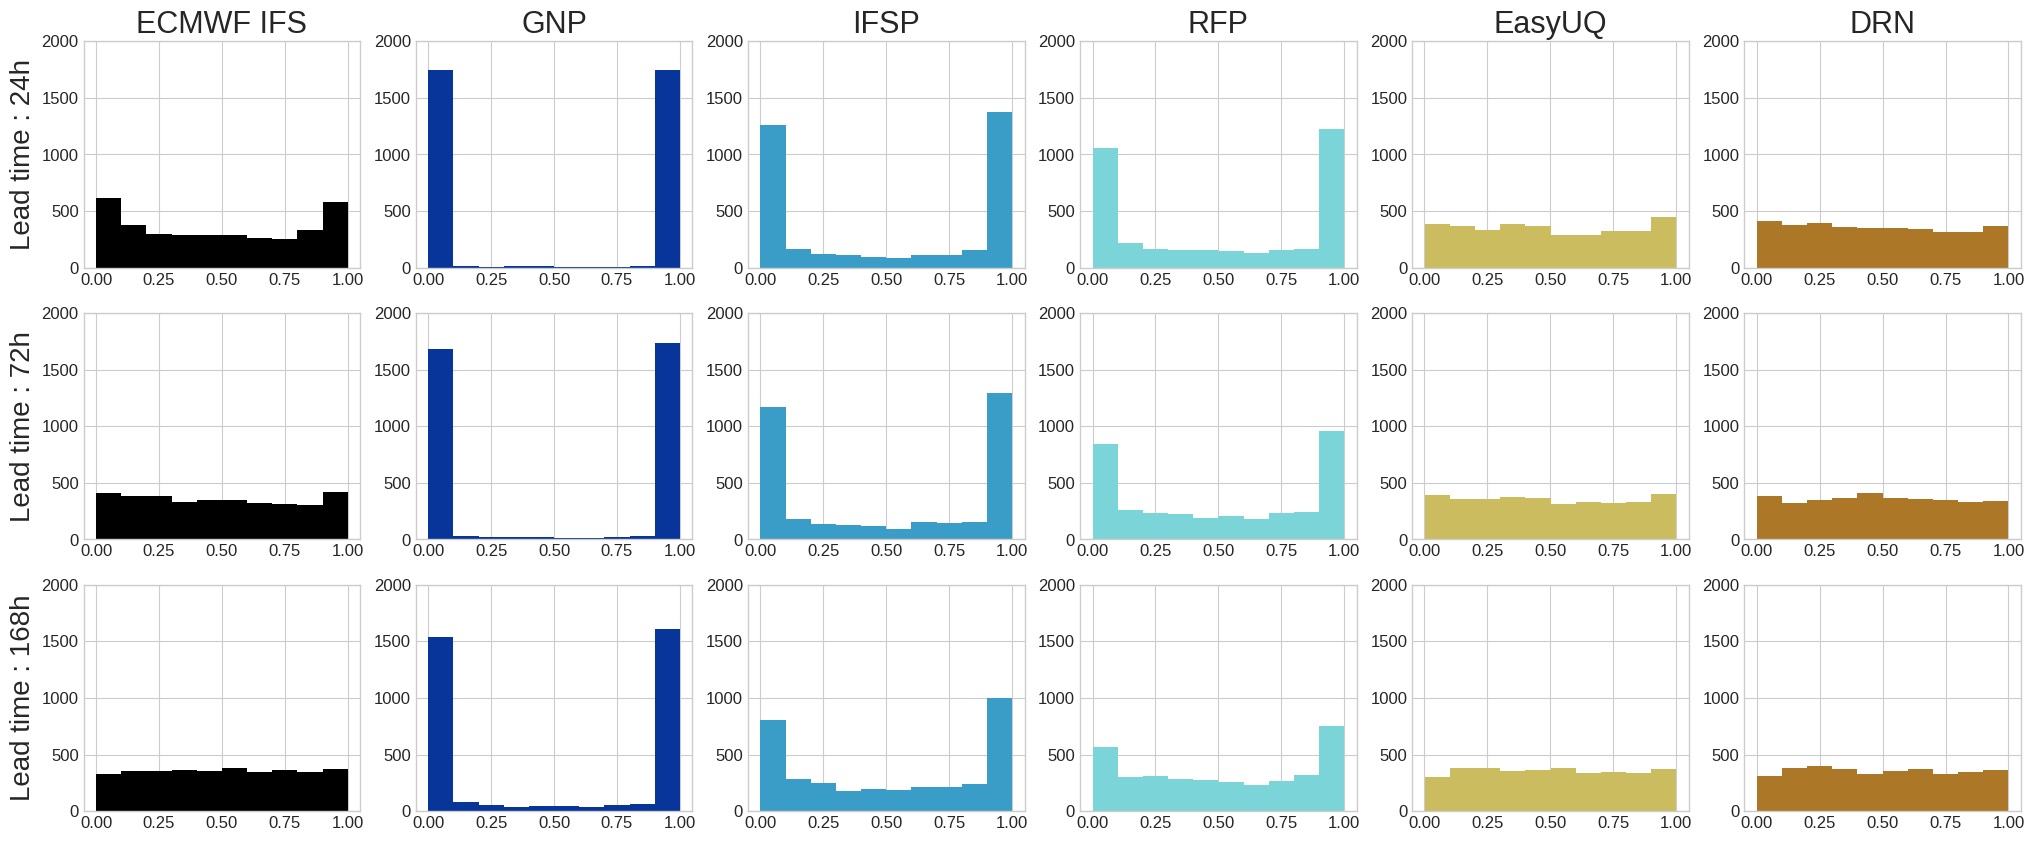

In [95]:
models = ["ECMWF IFS", "GNP", "IFSP", "RFP", "EasyUQ", "DRN"]
fig, axs = plt.subplots(3, 6, figsize = (25,10))


for i, model in enumerate(models):
    for t, lead_time in enumerate(lead_times):
        axs[t,i].hist(pit[t,i], color = colors[model])
        axs[t,i].set_ylim([0,2000])
        axs[t,0].set_ylabel(f"Lead time : {6*lead_time}h", fontsize = 20)
        axs[t,i].tick_params(axis='both', labelsize = 12)
        
    axs[0,i].set_title(f"{model}", fontsize = 22)
    
        
#fig.suptitle(f'PIT histograms for variable {list(idx.keys())[var]} and {n_grid} random grid points', fontsize = 25)

plt.savefig(plot_path + f"/pit_{var_name}.pdf", bbox_inches = "tight")

# Bias

In [11]:
var = 4
var_name = list(idx.keys())[var]
models = ["ECMWF IFS", "GNP", "IFSP", "RFP", "EasyUQ", "DRN"]

bias_results = xr.open_dataset(results_path + "bias.h5")[var_name]

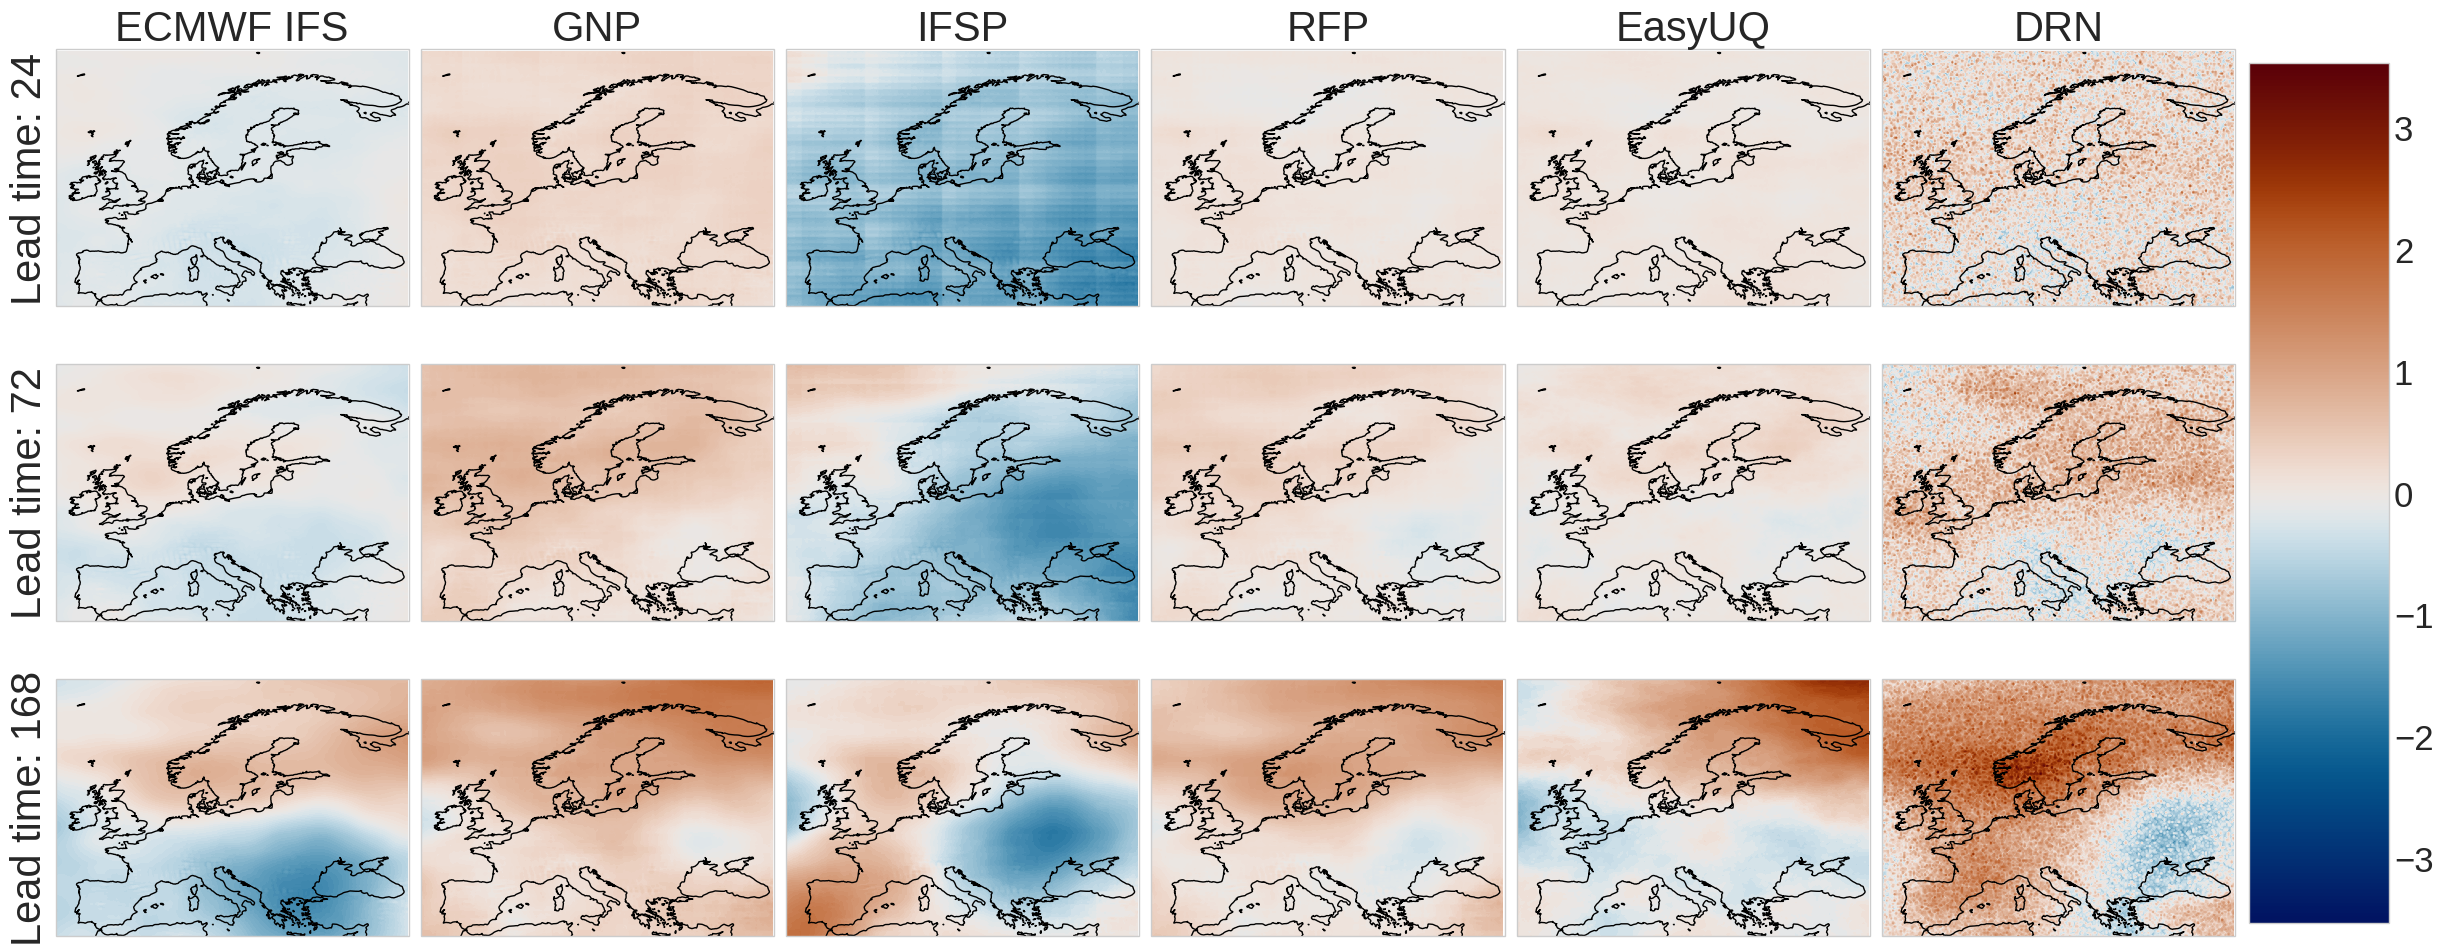

In [14]:
fig, axs = plt.subplots(3,6, figsize = (28,10),subplot_kw={'projection': ccrs.PlateCarree()})

for ax in axs.ravel():
    ax.set_extent([lon[0], lon[1], lat[0], lat[1]], crs=ccrs.PlateCarree())
    ax.add_feature(cfeature.COASTLINE)
    
# Normalizer
normalizer=CenteredNorm(halfrange = np.max([bias_results.min(),bias_results.max()]))
im=cm.ScalarMappable(norm=normalizer, cmap = "cmc.vik")
    
for t, lead_time in enumerate(lead_times):
    for i, model in enumerate(models):
        axs[t,i].contourf(lons, lats, bias_results[i,t], 60, transform=ccrs.PlateCarree(), norm = normalizer, cmap = "cmc.vik")
        
    axs[t,0].set_xticks([])
    axs[t,0].set_yticks([])
    axs[t,0].set_ylabel(f"Lead time: {lead_time *6}", fontsize = axissize)
axs[0,0].set_title("ECMWF IFS", fontsize = axissize)
axs[0,1].set_title("GNP", fontsize = axissize)
axs[0,2].set_title("IFSP", fontsize = axissize)
axs[0,3].set_title("RFP", fontsize = axissize)
axs[0,4].set_title("EasyUQ", fontsize = axissize)
axs[0,5].set_title("DRN", fontsize = axissize)

plt.tight_layout()
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.805, 0.05, 0.05, 0.86])
cb = fig.colorbar(im, cax=cbar_ax)
cb.ax.tick_params(labelsize=ticksize)

#plt.suptitle(f"Bias for variable {list(idx.keys())[var]}", fontsize = titlesize)
plt.savefig(plot_path +f"bias_{var_name}.png", bbox_inches = "tight")

# RMSE spread

In [13]:
var = 3
var_name = list(idx.keys())[var]
models = ["ECMWF IFS", "GNP", "IFSP", "RFP", "EasyUQ", "DRN"]
results = xr.open_dataset(results_path + "ensemble_spread_new.h5")[var_name].mean(dim = "phony_dim_0")

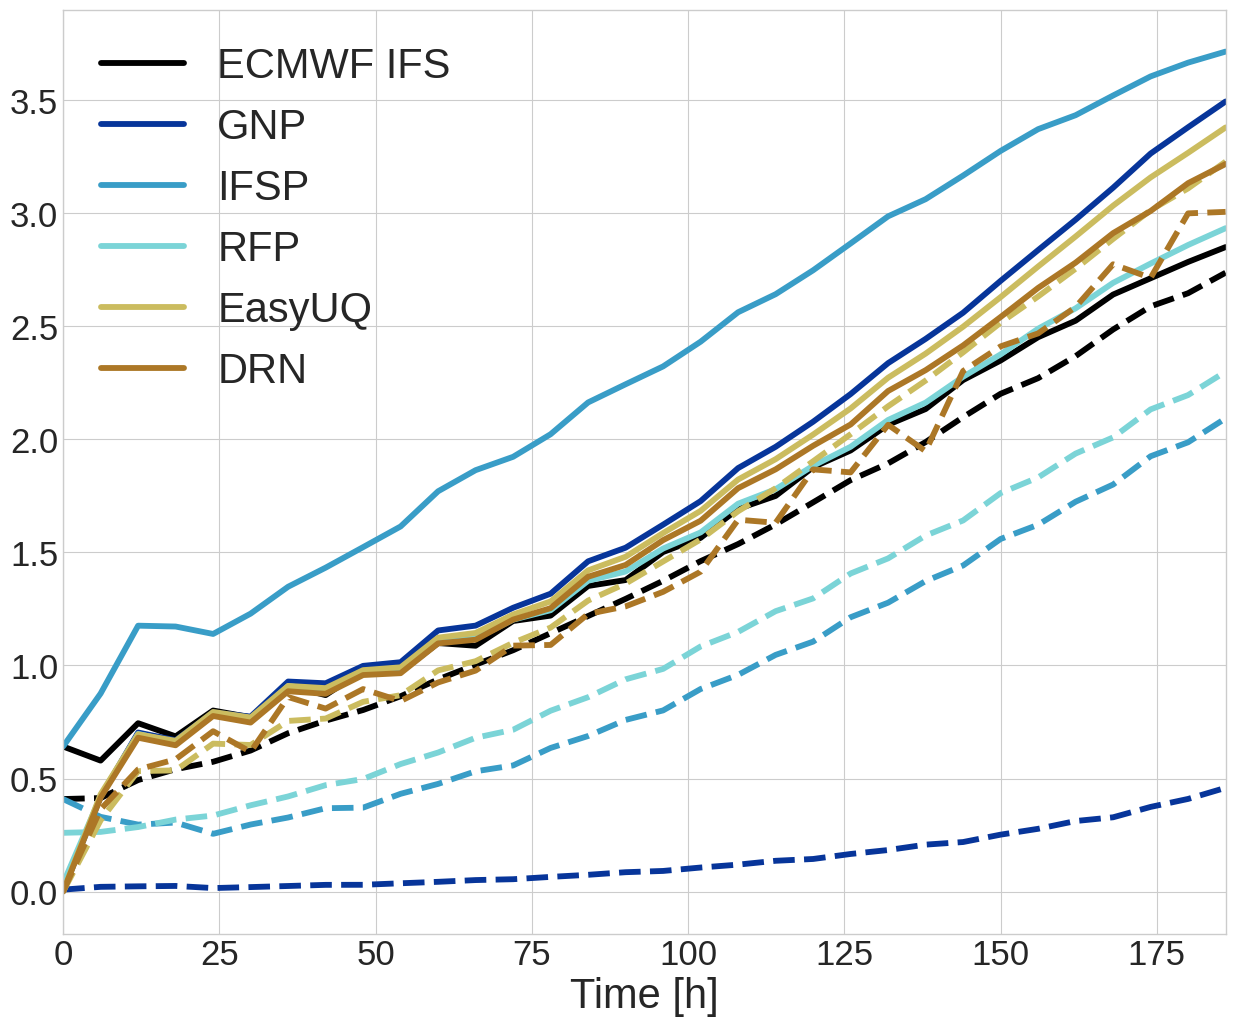

In [14]:
fig, axs = plt.subplots(figsize = (15,12))
h = np.arange(0,32)*6

for i, model in enumerate(models):
    axs.plot(h,results[:,i,0], color = colors[model], lw = lw, label = model)
    axs.plot(h,results[:,i,1], color = colors[model], linestyle = "--", lw = lw)

axs.legend(fontsize = axissize)
axs.set_xlabel(f"Time [h]", fontsize = axissize)
axs.tick_params(axis='both', labelsize = ticksize)
axs.set_xlim([0,186])

#fig.suptitle(list(idx.keys())[var], fontsize = titlesize)
plt.savefig(plot_path + f"rmse_spread_{var_name}.pdf", bbox_inches = "tight")